##FRADU DETECTION

Importing Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
print(credit_card_data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Dataset Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [9]:
# Checking null value(missing value)
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [15]:
# Handling missing values by imputation (fill with mean for simplicity)
credit_card_data.fillna(credit_card_data.mean(), inplace=True)

In [16]:
credit_card_data["Class"].value_counts()



,count
Class,
0.000000,7947
1.000000,25
0.003136,1


In [17]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [18]:
print(legit.shape)
print(fraud.shape)

(7947, 31)
(25, 31)


In [19]:
#statisitical measure of the data
legit.Amount.describe()

,Amount
count,7947.000000
mean,65.284891
std,194.126547
min,0.000000
25%,4.795000
50%,15.950000
75%,54.990000
max,7712.430000


In [20]:
fraud.Amount.describe()

,Amount
count,25.000000
mean,106.308400
std,372.676883
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


In [21]:
#compare the value for both transation
credit_card_data.groupby('Class').mean()



#Under sampling

#Build a sample dataset containing similar distribution and fradu distribution

#Number of fraude distribution = 25


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.000000,4246.546496,-0.297235,0.286979,0.917142,0.201968,-0.023263,0.164019,-0.019547,-0.072779,0.662196,...,0.042418,-0.055123,-0.165485,-0.034918,0.026636,0.088960,0.019511,0.014875,0.000417,65.284891
0.003136,10981.000000,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,0.043110,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540
1.000000,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


In [22]:
legit_sample = legit.sample(n=25)

In [23]:
# concatenting two data frame
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [24]:
print(new_dataset.shape)

(50, 31)


In [25]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6169,7180,-0.499406,1.024381,1.598574,1.396502,0.331646,0.404931,0.388758,0.189398,0.764904,...,-0.128453,0.174301,-0.126105,-0.025440,-0.145761,-0.278970,0.393681,0.188811,14.99,0.0
2768,2309,1.122758,-0.063738,0.925684,1.556180,-0.587771,0.271490,-0.419598,0.200907,0.944221,...,-0.092104,0.090131,-0.062797,0.096614,0.598594,-0.256309,0.070365,0.021249,6.00,0.0
2867,2429,-0.436030,1.635475,1.647855,2.468624,0.625894,0.347932,0.825010,-0.188491,-1.207540,...,-0.321424,-0.544905,-0.144442,-0.474564,-0.241057,-0.015167,0.330356,0.035417,6.77,0.0
2877,2432,-0.653548,0.901821,0.740046,-2.221392,0.291005,-1.242903,1.103925,-0.398820,1.223008,...,0.011237,0.386120,-0.332029,-0.132182,0.156423,-0.815135,0.199831,0.038434,1.00,0.0
3980,3630,-0.884235,0.993348,1.901040,-0.194557,0.330835,-0.254230,0.839262,-0.173872,1.085489,...,-0.346363,-0.675996,-0.303634,-0.140838,0.519798,0.169280,-0.153101,0.039810,30.36,0.0


In [26]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6870,8757,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,...,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00,1.0
6882,8808,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10,1.0
6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00,1.0
6903,8886,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,...,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00,1.0
6971,9064,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1.0


In [27]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,25
1.0,25


In [28]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,3913.56,-0.062197,0.544778,1.014748,0.729816,0.024762,0.384713,-0.014845,-0.347845,0.559358,...,0.050417,-0.000313,-0.121111,-0.094760,-0.011421,0.120876,0.062138,0.015735,0.003632,43.1904
1.0,7359.24,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.3084


In [29]:
# splitting the data into features &target
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [30]:
print(X)

       Time        V1        V2        V3        V4        V5        V6  \
6169   7180 -0.499406  1.024381  1.598574  1.396502  0.331646  0.404931   
2768   2309  1.122758 -0.063738  0.925684  1.556180 -0.587771  0.271490   
2867   2429 -0.436030  1.635475  1.647855  2.468624  0.625894  0.347932   
2877   2432 -0.653548  0.901821  0.740046 -2.221392  0.291005 -1.242903   
3980   3630 -0.884235  0.993348  1.901040 -0.194557  0.330835 -0.254230   
2562   2106 -0.381266  0.715988  1.237381 -1.956540  0.005965 -1.693550   
7416  10018 -0.308614  0.321557  1.666761  0.516714 -0.332586 -0.351705   
5588   5747 -0.350175  0.896325  0.109224 -1.009776  2.527554  3.416541   
72       47  1.197839  0.236828  0.509605  0.657659 -0.365488 -0.745101   
7149   9369  1.198102 -0.085667  0.924345  0.918734 -0.575932  0.220180   
254     179 -0.431092  0.890752  1.720543 -0.238246  0.273263 -0.970191   
1521   1190  1.242032 -0.109534  0.506126  0.454072 -0.258939  0.372521   
5019   4622  1.194182  0.

In [31]:
print(Y)

6169    0.0
2768    0.0
2867    0.0
2877    0.0
3980    0.0
2562    0.0
7416    0.0
5588    0.0
72      0.0
7149    0.0
254     0.0
1521    0.0
5019    0.0
2518    0.0
2088    0.0
2824    0.0
1099    0.0
1716    0.0
1359    0.0
553     0.0
6990    0.0
6746    0.0
5690    0.0
6864    0.0
4965    0.0
541     1.0
623     1.0
4920    1.0
6108    1.0
6329    1.0
6331    1.0
6334    1.0
6336    1.0
6338    1.0
6427    1.0
6446    1.0
6472    1.0
6529    1.0
6609    1.0
6641    1.0
6717    1.0
6719    1.0
6734    1.0
6774    1.0
6820    1.0
6870    1.0
6882    1.0
6899    1.0
6903    1.0
6971    1.0
Name: Class, dtype: float64


In [32]:
#split the data into traing data  & testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(50, 30) (40, 30) (10, 30)


In [34]:
print(Y.shape, Y_train.shape, Y_test.shape)

(50,) (40,) (10,)


In [35]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Correlation Matrix

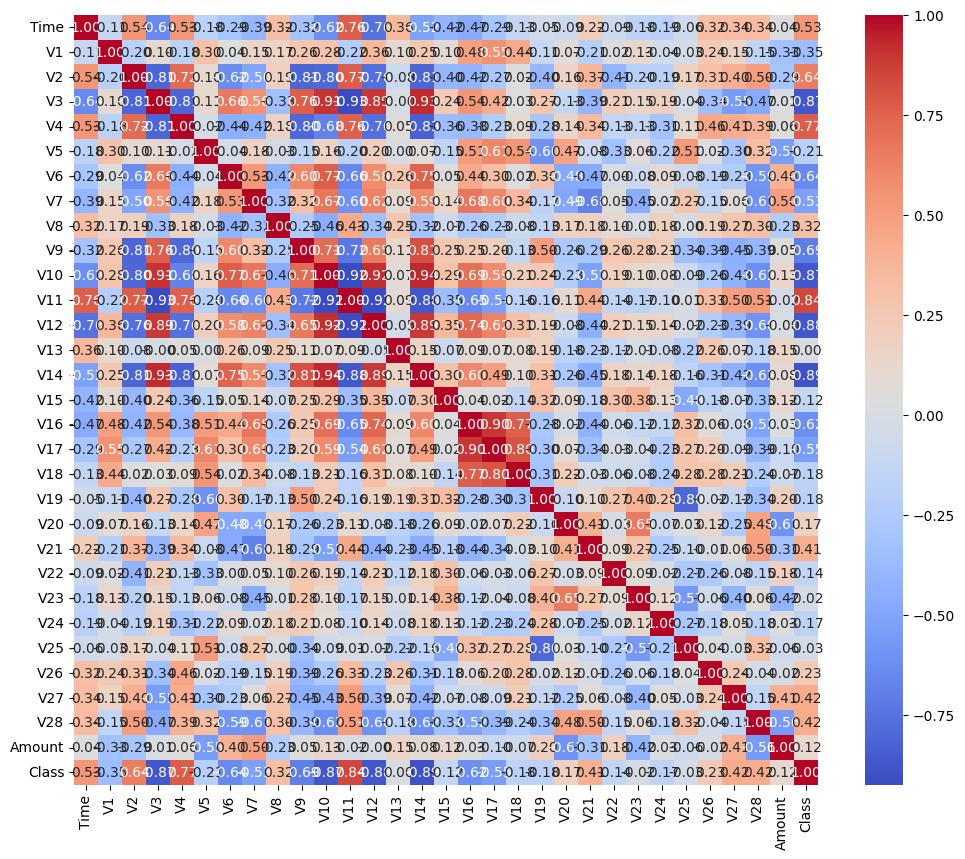

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = new_dataset.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Model Training

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Accuracy score

In [41]:
#Accuray on  training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [45]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained the model
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', training_data_accuracy)


Accuracy on Test data :  0.8


1.Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

In [47]:
# Score the model
score = gnb.score(X_train, Y_train)
print(f'Training score: {score}')

Training score: 1.0


In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=1)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [50]:
# Apply SMOTE to the training data
smote = SMOTE(k_neighbors=1)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_resampled, Y_resampled)

# Make predictions on the test data
X_test_prediction = model.predict(X_test)

# Calculate the accuracy on the test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Print the accuracy
print('Accuracy on Test data:', test_data_accuracy)

Accuracy on Test data: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model evalution

1.ROC Curve

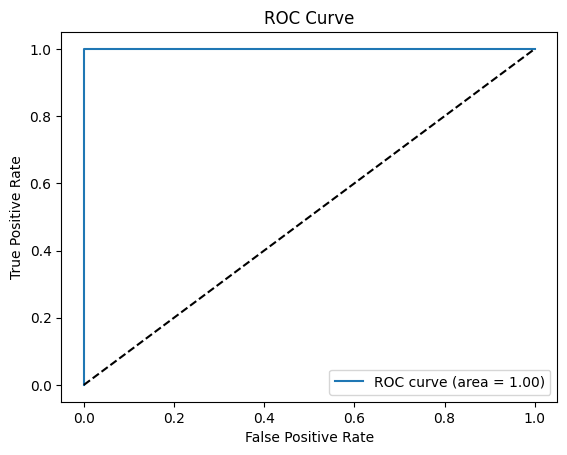

In [51]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(Y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
#F1 score

from sklearn.metrics import f1_score

y_pred = model.predict(X)
f1 = f1_score(Y, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 1.0


Results and Interpretation

1.Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y, y_pred)
print(cm)

[[25  0]
 [ 0 25]]


In [79]:
!pip install imbalanced-learn --upgrade


In [84]:
!pip install scipy==1.4.1


  Using cached scipy-1.4.1.tar.gz (24.6 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [85]:
# In scikitplot/metrics.py
from numpy import interp  # Replace this line with the correct import


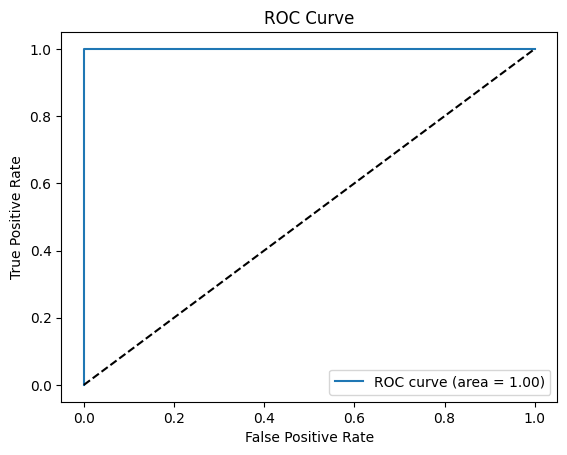

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(Y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()





Practical Implementation

    Infrastructure for Deployment



In [ ]:
- **Server**: Ensure you have a reliable server with sufficient resources (CPU, RAM).
- **Framework**: Use a framework like Flask or FastAPI to serve your model.
- **Containerization**: Use Docker for containerizing your application.
- **Monitoring**: Tools like Prometheus and Grafana can help monitor model performance.

Monitoring the Deployed Model

In [ ]:
- **Logging**: Log predictions and compare them with actual outcomes.
- **Alerts**: Set up alerts for model performance degradation.
- **Retraining**: Establish a pipeline for retraining the model with new data.